# Echologger collection via API

In [1]:
from Scripts.echosndr import DualEchosounder
import time

## Connect and halt pinging
Assign the COM port.

In [2]:
# Connect to the echosounder via serial
ss = DualEchosounder("\\\\.\\COM3", 115200) # Assign the COM if necessary
while ss.IsRunning(): # Check if it's running
    ss.Detect() # Stop pinging
time.sleep(.11)

## Set internal clock and setup collection parameters

In [3]:
# Set the time from the computer
ss.SetCurrentTime()
time.sleep(.1)

# Pulse length - Low frequency
ss.SetValue("IdTxLengthL", "500") 
time.sleep(.1)

 # Pulse length - High frequency
ss.SetValue("IdTxLengthH", "500")
time.sleep(.1)

# Range - Low frequency
ss.SetValue("IdRangeL", "10000")
time.sleep(.1)

# Range - High frequency
ss.SetValue("IdRangeH", "10000") 
time.sleep(.1)

# Output mode - 1: altimeter, 2: 10-bit text echo, 3: NMEA, 4: 12-bit text echo, 100: 12-bit binary echo, 101: 8-bit binary echo
ss.SetValue("IdOutput", "100")
time.sleep(.1)

# ADC Sampling frequency - 0 (Auto), 6250, 12500, 25000, 50000, 100000
ss.SetValue("IdSamplFreq", "12500")
time.sleep(.1)

# Ping Interval - 0.1-10 seconds
ss.SetValue("IdInterval", "1")
time.sleep(.1)

# Set dual frequency mode (alternating pings)
ss.SendCommand("IdSetDualFreq")

1

## Set Transmit and TVG details

In [4]:
# Sound speed
ss.SetValue("IdSound", "1448") 
time.sleep(.1)

# TVG Mode - 1: gain + K*log(R) + TL*R, 2: gain + K*log(R), 3: gain, 4: gain + TL*R
ss.SetValue("IdTVGMode", "3") 
time.sleep(.1)

# TVG Spreading Coefficient (K) - Low frequency
ss.SetValue("IdTVGSprdL", "0") 
time.sleep(.1)

# TVG Spreading Coefficient (K) - High frequency
ss.SetValue("IdTVGSprdH", "0") 
time.sleep(.1)

# Absorption coefficient - Low frequency
ss.SetValue("IdTVGAbsL", "0.0") 
time.sleep(.1)

# Absorption coefficient - High frequency
ss.SetValue("IdTVGAbsH", "0.0") 
time.sleep(.1)

# Gain - Low frequency
ss.SetValue("IdGainL", "60") 
time.sleep(.1)

# Gain - High frequency
ss.SetValue("IdGainH", "60") 
time.sleep(.1)


# Gain - High frequency
ss.SetValue("IdAttnL", "0") 
time.sleep(.1)

# Gain - High frequency
ss.SetValue("IdAttnH", "0") 
time.sleep(.1)


In [5]:
ss.GetValue("IdGainL")

'60'

## Collect data to a file
Define the output file and number of pings to collect.

In [6]:
output_filename = 'D://120924_38WC_G60_G60_OffDockSwing_8.log'
numPings = 200

In [10]:
ss.Detect() 

True

In [7]:
# Collect the data directly to the binary file
with open(output_filename, "wb") as binary_file:
    # start pinging
    ss.Start() 
    # set the starting ping number
    ping = 0 
    
    # Try to keep track to ensure 30 pings
    while ping <=numPings: 
        # Read the stream
        input = ss._serial_port.readline()
        # Write the stream
        binary_file.write(input)
        # If we identify a new ping, iterate
        if b'ECHOLOGG' in input: 
            print('Echo detected, ping ',ping)
            ping+=1

# Try to stop nicely
ss.Stop() 

# If not stopping nicely...
while ss.IsRunning(): 
    # Run a detect to stop pinging
    ss.Detect() 

# close the binary file
binary_file.close()

Echo detected, ping  0
Echo detected, ping  1
Echo detected, ping  2
Echo detected, ping  3
Echo detected, ping  4
Echo detected, ping  5
Echo detected, ping  6
Echo detected, ping  7
Echo detected, ping  8
Echo detected, ping  9
Echo detected, ping  10
Echo detected, ping  11
Echo detected, ping  12
Echo detected, ping  13
Echo detected, ping  14
Echo detected, ping  15
Echo detected, ping  16
Echo detected, ping  17
Echo detected, ping  18
Echo detected, ping  19
Echo detected, ping  20
Echo detected, ping  21
Echo detected, ping  22
Echo detected, ping  23
Echo detected, ping  24
Echo detected, ping  25
Echo detected, ping  26
Echo detected, ping  27
Echo detected, ping  28
Echo detected, ping  29
Echo detected, ping  30
Echo detected, ping  31
Echo detected, ping  32
Echo detected, ping  33
Echo detected, ping  34
Echo detected, ping  35
Echo detected, ping  36
Echo detected, ping  37
Echo detected, ping  38
Echo detected, ping  39
Echo detected, ping  40
Echo detected, ping  41
Ec

# Reading a file

In [8]:
from Scripts import echologgerData
echo = echologgerData.echologgerData()
echo.readBinaryFile(output_filename)

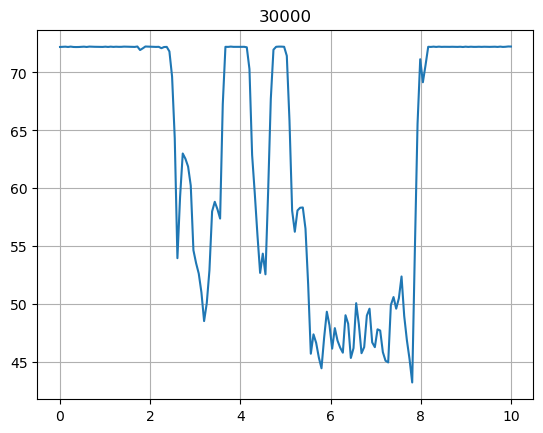

In [10]:
import matplotlib.pyplot as plt
import numpy as np
i =21
plt.plot(echo.range[i],10*np.log10(echo.allPings[i]**2))
plt.title(echo.frequency[i])
plt.grid()

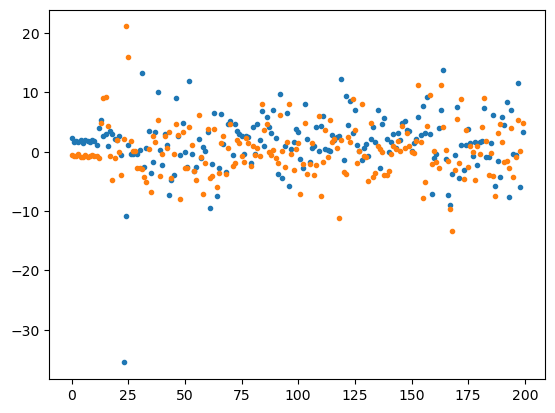

In [11]:
plt.plot(echo.pitch,'.')
plt.plot(echo.roll,'.')
#plt.ylim([-5,6])

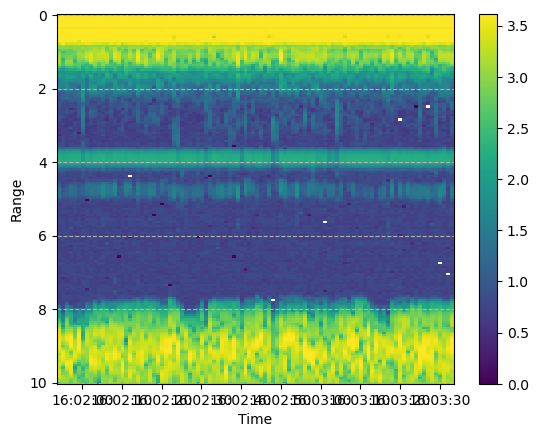

In [83]:
echo.echogram()